<a href="https://colab.research.google.com/github/pornnakanok/AIPrototype2023/blob/main/Tensorflow_(Deep_learning_Implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential ; ง่าย แต่สร้างได้แบบไม่ซับซ้อน (วิ่งเป็นเส้นตรง)
2. Functional ; ยากขึ้นมาอีกนิด แต่สามารถปรับเส้นทางให้มีความซับซ้อนได้

3. Subclassing ; ยากสุด แต่สามารถแก้ไขได้ตามที่เราต้องการ

# Import

In [ ]:
import tensorflow as tf #ตัวรัน
from tensorflow import keras #interface
from tensorflow.keras import layers

# Define

In [ ]:
#Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.Input(shape=(4, )), #input มี 4 node
        layers.Dense(2, activation="relu", name="layer1"), #Dense 2 node
        layers.Dense(3, activation="relu", name="layer2"), #Dense 3 node
        layers.Dense(5, activation="softmax", name="output"), #Dense 4 node
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train (รวมกับการนำเข้าข้อมูลใน colab notebook หน้า)

# Predict

In [ ]:
#call model on a test input
x = tf.ones((5, 4))

In [ ]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [ ]:
y = model(x)

In [ ]:
y

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.14143872, 0.24183907, 0.19302987, 0.21007039, 0.2136219 ],
       [0.14143872, 0.24183907, 0.19302987, 0.21007039, 0.2136219 ],
       [0.14143872, 0.24183907, 0.19302987, 0.21007039, 0.2136219 ],
       [0.14143872, 0.24183907, 0.19302987, 0.21007039, 0.2136219 ],
       [0.14143872, 0.24183907, 0.19302987, 0.21007039, 0.2136219 ]],
      dtype=float32)>

## สร้าง sequential แบบที่สอง

In [ ]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(5, activation="softmax"))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## ปรับเปลี่ยน Network

In [ ]:
model2.pop() #ดึงเลเยอร์สุดท้ายออกมา? เอา output ออก?

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.add(layers.Dense(6)) #เพิ่มเลเยอร์เข้าไป

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x = tf.ones((5, 4)) # 5 datapoint feature 4 ตัว
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[-0.133807  , -0.04039389,  0.14398491,  0.06602476, -0.10057685,
        -0.05069225],
       [-0.133807  , -0.04039389,  0.14398491,  0.06602476, -0.10057685,
        -0.05069225],
       [-0.133807  , -0.04039389,  0.14398491,  0.06602476, -0.10057685,
        -0.05069225],
       [-0.133807  , -0.04039389,  0.14398491,  0.06602476, -0.10057685,
        -0.05069225],
       [-0.133807  , -0.04039389,  0.14398491,  0.06602476, -0.10057685,
        -0.05069225]], dtype=float32)>

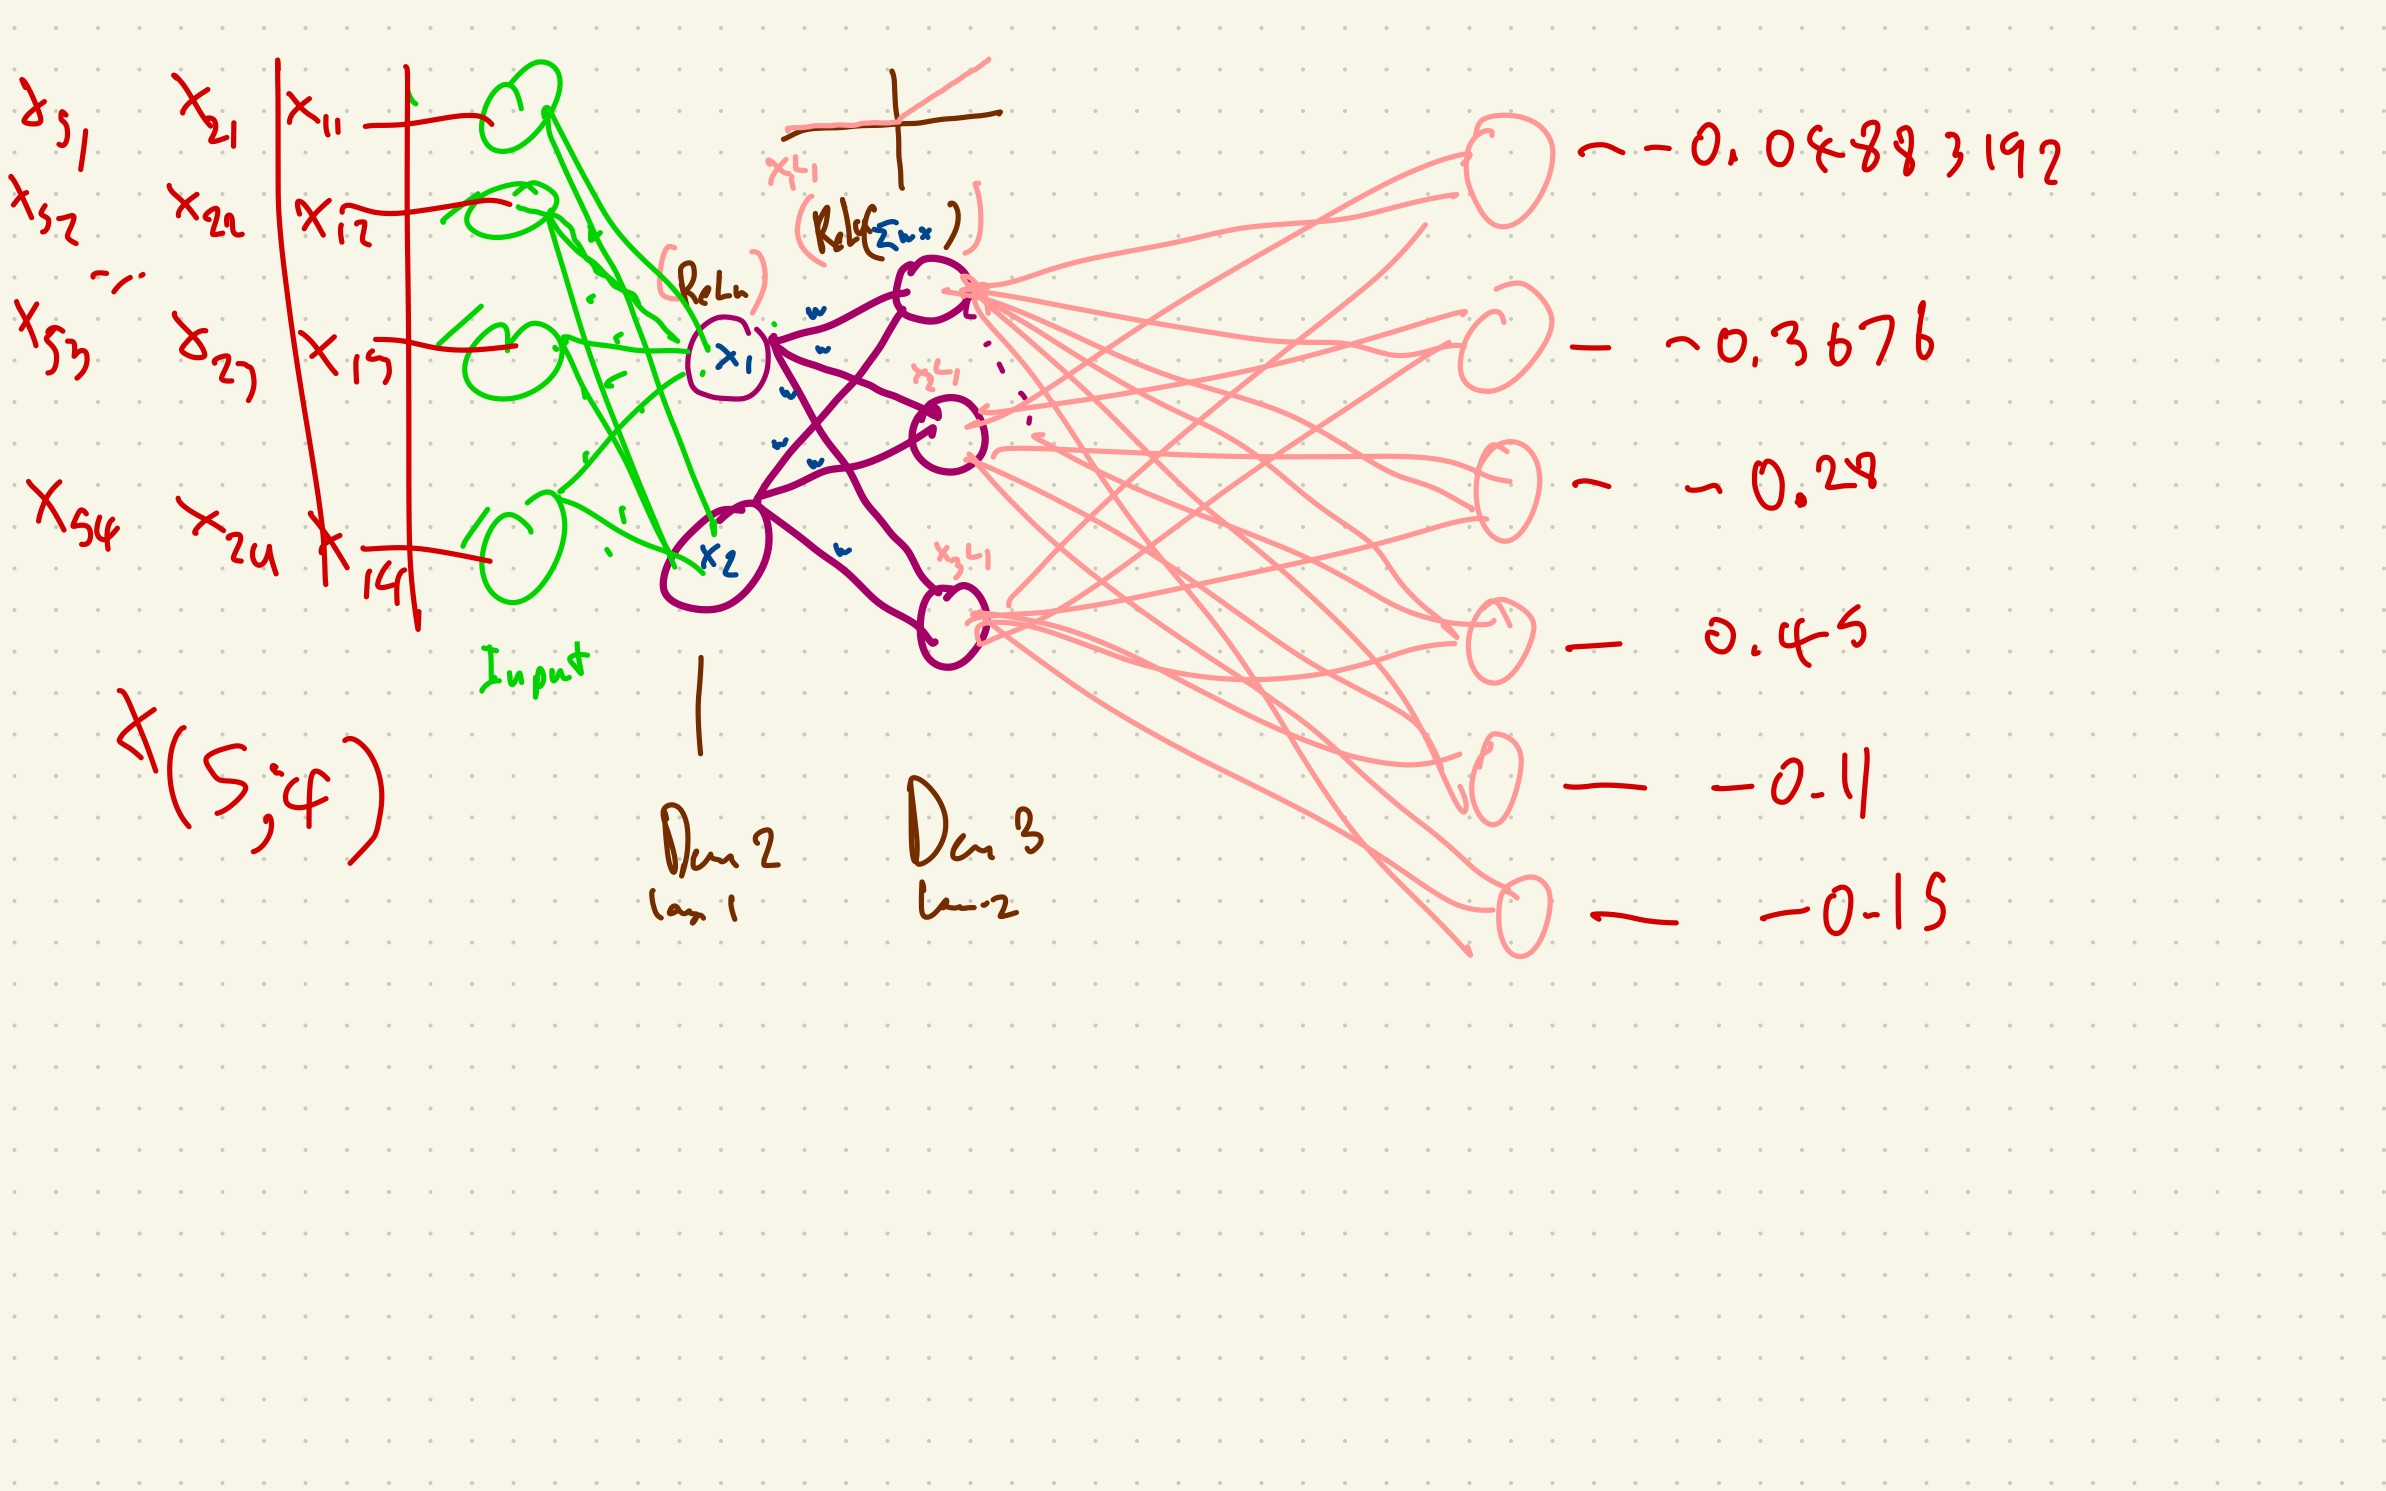

# ลองเทรน Sequential model ที่สร้างขึ้นเอง

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## load data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


### แปลงค่าเป็น 0-1 เพื่อนำเข้า network

In [ ]:
# Normalize pixel values to be between 0 and 1 ค่าเกินไม่ได้
train_images, test_images = train_images / 255.0, test_images / 255.0

### plot รูปตัวอย่าง

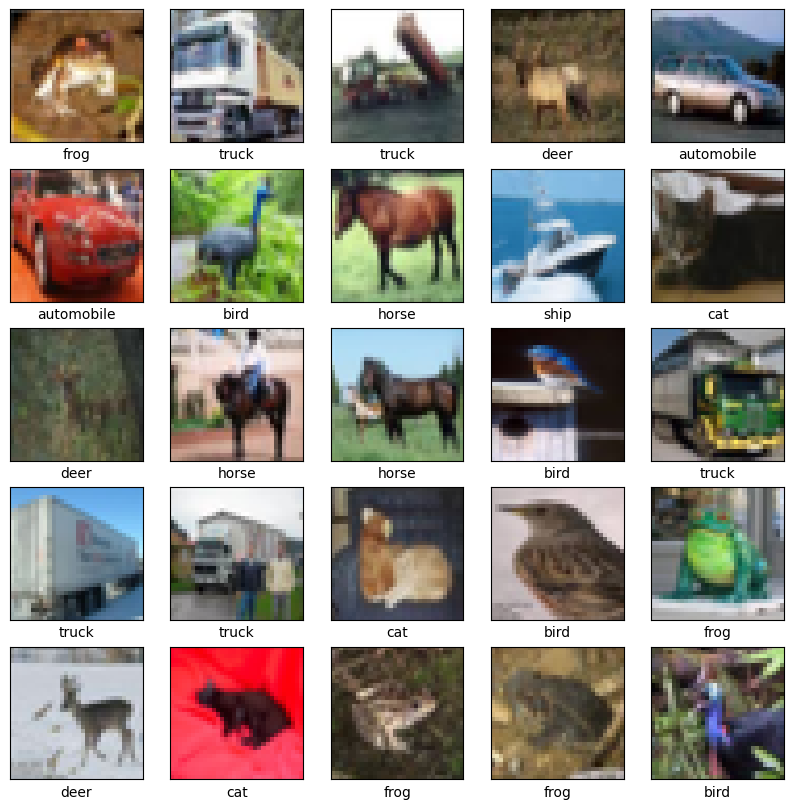

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Define

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #รับภาพเข้ามา 32*32 มี 3 channel ขนาด 3*3 มีฟิลเตอร์ให้เรียนรู้ 32 อัน
model.add(layers.MaxPooling2D((2, 2))) #ดูทุกๆ 2 pixel? จำนวน layers เท่าเดิม เอามาสรุปเฉยๆ ไม่มีพารามิเตอร์
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #64 ฟิลเตอร์
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

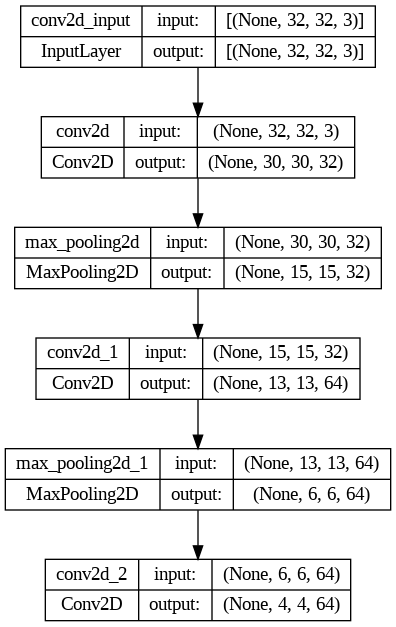

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

### ต่อด้วย flatten และ dense เพื่อทำนาย

In [ ]:
#จับพารามิเตอร์มายืดเป็นเส้นตรง (input) ทำให้มันไม่มีมิติ?

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

### Define training parameters

In [ ]:
model.compile(optimizer='adam', # optimizer ใช้้ชี้ว่า network วิ่งไปแบบไหนดี
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss คำนวนว่าผิดมากผิดน้อย SparseCategoricalCrossentropy ให้ทุกอันเป็น 0 มี 1 แค่อันเดียว
              metrics=['accuracy'])

### Train

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
history = model.fit(train_images, train_labels, epochs=2, #epochs ให้เห็น data ทั้งหมดกี่รอบ
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 83s 51ms/step - loss: 1.5344 - accuracy: 0.4406 - val_loss: 1.2653 - val_accuracy: 0.5438
Epoch 2/2
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1574 - accuracy: 0.5903 - val_loss: 1.0810 - val_accuracy: 0.6161


### Test

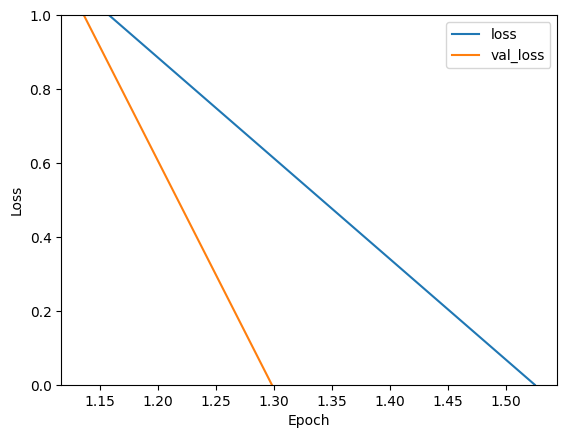

In [ ]:
plt.plot(history.history['loss'], [0, 1], label='loss')
plt.plot(history.history['val_loss'], [0, 1], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 4s - loss: 1.1362 - accuracy: 0.5975 - 4s/epoch - 12ms/step


In [ ]:
print(test_acc)

0.5975000262260437


## Functional

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
input_images = keras.Input(shape=(32, 32, 3), name="img") #กำหนดเลเยอร์ที่เป็นอินพุด กำหนด shape ละก็ตั้งชื่อว่า image
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # (input_images) input จาก layer ก่อนหน้า ฟิลเตอร์ 32 ตัว 3*3
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

In [ ]:
my_model = keras.Model(input_images, output, name = "mymodel")

In [ ]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

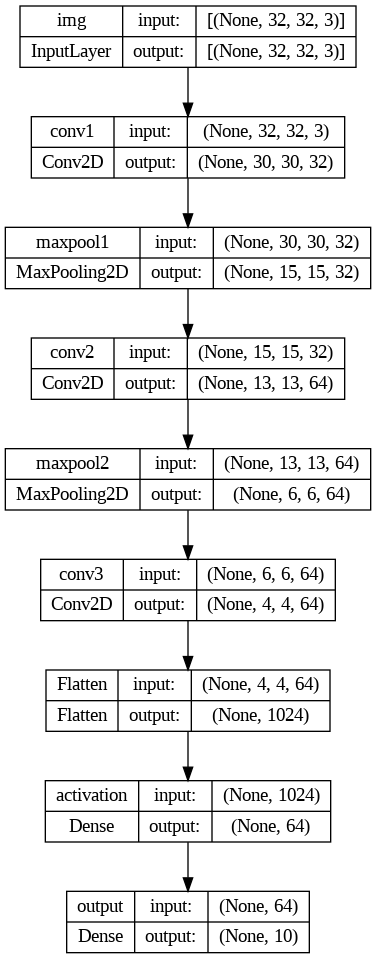

In [ ]:
keras.utils.plot_model(my_model, show_shapes=True)

In [ ]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = my_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5368 - accuracy: 0.4389 - val_loss: 1.2435 - val_accuracy: 0.5669
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1588 - accuracy: 0.5892 - val_loss: 1.0613 - val_accuracy: 0.6203
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0028 - accuracy: 0.6495 - val_loss: 0.9807 - val_accuracy: 0.6612
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9003 - accuracy: 0.6833 - val_loss: 0.9667 - val_accuracy: 0.6630
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8279 - accuracy: 0.7113 - val_loss: 0.9629 - val_accuracy: 0.6670
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7681 - accuracy: 0.7313 - val_loss: 0.8905 - val_accuracy: 0.6981
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7218 - accuracy: 0.7487 - val_loss: 0.9050 -

313/313 - 1s - loss: 0.9153 - accuracy: 0.6973 - 641ms/epoch - 2ms/step


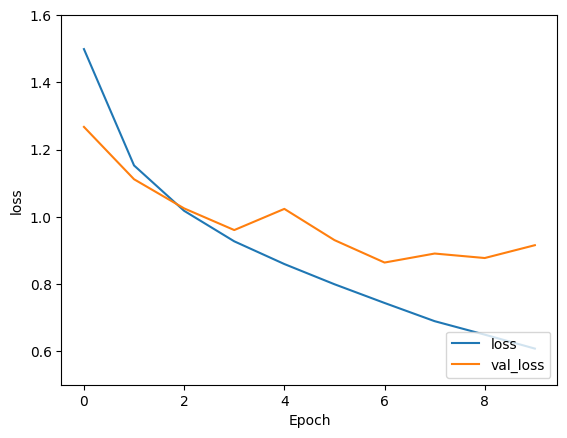

In [ ]:
plt.plot(range(10), history.history['loss'], label='loss')
plt.plot(range(10), history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1.6])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6973000168800354


### ResNet

In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output) #รับ output ของ block แรก
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output]) #เอา layer มาต่อกัน แล้วไปรับ output ของ block 1

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_4 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d_3[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_4[0][0]']            
 g2D)                                                                                    

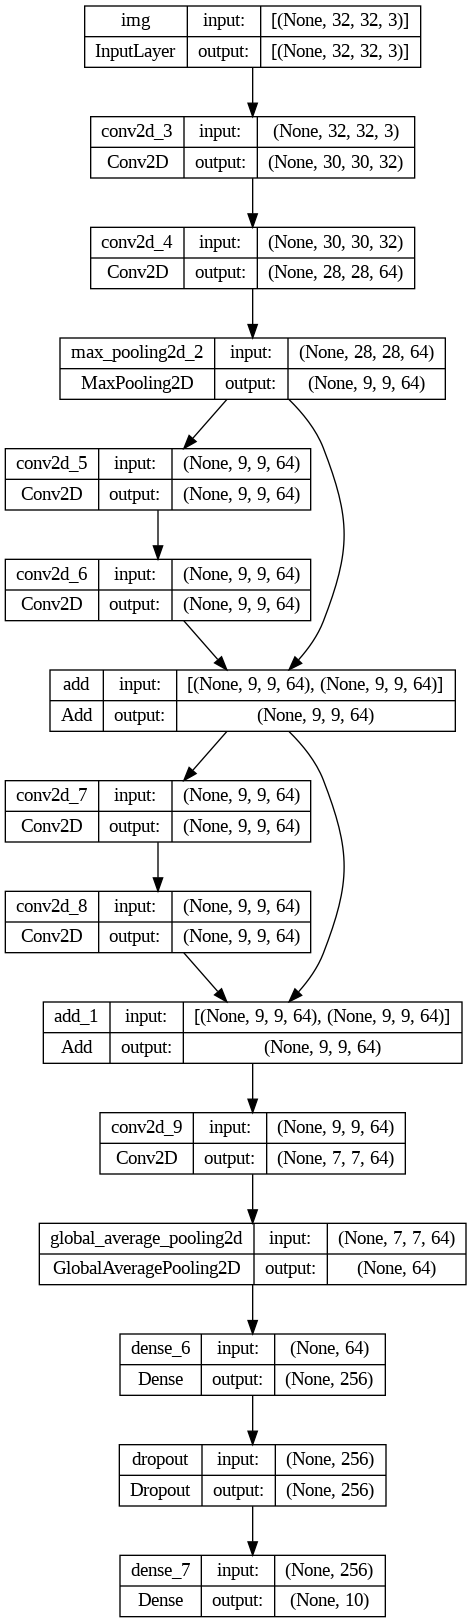

In [ ]:
keras.utils.plot_model(resnet_model,  show_shapes=True)

In [ ]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 278s 177ms/step - loss: 1.6664 - accuracy: 0.3554 - val_loss: 1.2954 - val_accuracy: 0.5222
Epoch 2/10
1563/1563 [==============================] - 275s 176ms/step - loss: 1.1993 - accuracy: 0.5634 - val_loss: 1.0264 - val_accuracy: 0.6274
Epoch 3/10
1563/1563 [==============================] - 273s 175ms/step - loss: 0.9863 - accuracy: 0.6441 - val_loss: 0.8899 - val_accuracy: 0.6847
Epoch 4/10
1015/1563 [==================>...........] - ETA: 1:33 - loss: 0.8590 - accuracy: 0.6944

313/313 - 1s - loss: 0.9153 - accuracy: 0.6973 - 654ms/epoch - 2ms/step


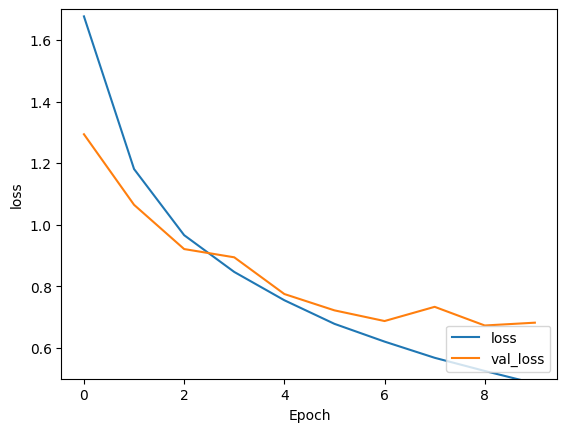

In [ ]:
plt.plot(range(10), history.history['loss'], label='loss')
plt.plot(range(10), history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1.7])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6973000168800354


# Tensorflow Data Pipeline

flow from directory สร้างเก็บไว้เลย

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [ ]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_11 (Conv2D)          (None, 196, 196, 64)         18496     ['conv2d_10[0][0]']           
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_11[0][0]']           
 g2D)                                                                               

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( #ไม่ว่าจะขนาดเท่าไหร่ กลับหัวแบบไหน ยังไงก็เป็นหมาเหมือนเดิม
      rescale=1./255,
      rotation_range=360,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=1, #เข้าไปทีละกี่รูป
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import optimizers

In [ ]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=1e-3), #learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch=30, #data ไหลผ่านเข้ามาในเน็ตเวิร์ก 7 ครั้ง ถึงจะครบ
      epochs=50,
      verbose=1)

<ipython-input-44-cea16d3dd829>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


Epoch 1/50
30/30 [==============================] - 12s 374ms/step - loss: 0.6854 - accuracy: 0.5333
Epoch 2/50
30/30 [==============================] - 9s 299ms/step - loss: 0.6920 - accuracy: 0.5667
Epoch 3/50
30/30 [==============================] - 11s 357ms/step - loss: 0.7045 - accuracy: 0.4333
Epoch 4/50
30/30 [==============================] - 10s 329ms/step - loss: 0.7101 - accuracy: 0.4333
Epoch 5/50
30/30 [==============================] - 10s 311ms/step - loss: 0.7074 - accuracy: 0.5333
Epoch 6/50
30/30 [==============================] - 11s 352ms/step - loss: 0.7350 - accuracy: 0.4333
Epoch 7/50
30/30 [==============================] - 9s 303ms/step - loss: 0.7133 - accuracy: 0.4333
Epoch 8/50
30/30 [==============================] - 10s 333ms/step - loss: 0.6821 - accuracy: 0.6667
Epoch 9/50
30/30 [==============================] - 10s 349ms/step - loss: 0.6739 - accuracy: 0.6667
Epoch 10/50
30/30 [==============================] - 9s 298ms/step - loss: 0.7167 - accuracy:

313/313 - 4s - loss: 2.3083 - accuracy: 0.1101 - 4s/epoch - 13ms/step


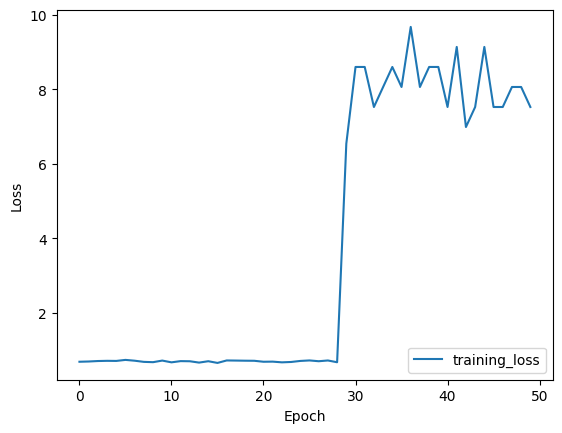

In [ ]:
plt.plot(range(50),history.history['loss'], label='training_loss')
#plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim()
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_loss)

In [ ]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=1e-3), #learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch=30, #data ไหลผ่านเข้ามาในเน็ตเวิร์ก 7 ครั้ง ถึงจะครบ
      epochs=50,
      verbose=1)

Epoch 1/50


<ipython-input-48-cea16d3dd829>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


30/30 [==============================] - 12s 352ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 2/50
30/30 [==============================] - 10s 342ms/step - loss: 6.9845 - accuracy: 0.5000
Epoch 3/50
30/30 [==============================] - 11s 350ms/step - loss: 8.5963 - accuracy: 0.5000
Epoch 4/50
30/30 [==============================] - 11s 355ms/step - loss: 5.3727 - accuracy: 0.5000
Epoch 5/50
30/30 [==============================] - 10s 351ms/step - loss: 9.6709 - accuracy: 0.5000
Epoch 6/50
30/30 [==============================] - 9s 285ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 7/50
30/30 [==============================] - 10s 332ms/step - loss: 8.5963 - accuracy: 0.5000
Epoch 8/50
30/30 [==============================] - 11s 355ms/step - loss: 7.5218 - accuracy: 0.5000
Epoch 9/50
30/30 [==============================] - 11s 358ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 10/50
30/30 [==============================] - 10s 319ms/step - loss: 7.5218 - accuracy: 0.5000
E

313/313 - 3s - loss: 2.3083 - accuracy: 0.1101 - 3s/epoch - 11ms/step


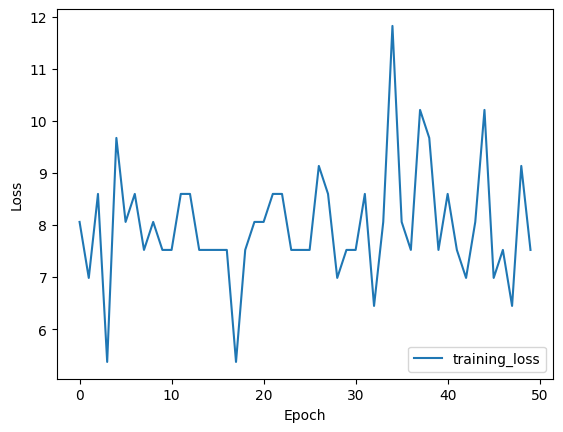

In [ ]:
plt.plot(range(50),history.history['loss'], label='training_loss')
#plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim()
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2, activation='softmax')(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_17 (Conv2D)          (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_18 (Conv2D)          (None, 196, 196, 64)         18496     ['conv2d_17[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_18[0][0]']           
 g2D)                                                                               

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( #ไม่ว่าจะขนาดเท่าไหร่ กลับหัวแบบไหน ยังไงก็เป็นหมาเหมือนเดิม
      rescale=1./255,
      rotation_range=360,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=1, #เข้าไปทีละกี่รูป
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import optimizers

In [ ]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=1e-3), #learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch=30, #data ไหลผ่านเข้ามาในเน็ตเวิร์ก 7 ครั้ง ถึงจะครบ
      epochs=50,
      verbose=1)

Epoch 1/50


<ipython-input-54-cea16d3dd829>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


30/30 [==============================] - 13s 360ms/step - loss: 0.7197 - accuracy: 0.4000
Epoch 2/50
30/30 [==============================] - 11s 358ms/step - loss: 0.6999 - accuracy: 0.3000
Epoch 3/50
30/30 [==============================] - 11s 350ms/step - loss: 0.6917 - accuracy: 0.6000
Epoch 4/50
30/30 [==============================] - 11s 356ms/step - loss: 0.7013 - accuracy: 0.3333
Epoch 5/50
30/30 [==============================] - 10s 344ms/step - loss: 0.7140 - accuracy: 0.6333
Epoch 6/50
30/30 [==============================] - 11s 358ms/step - loss: 0.7393 - accuracy: 0.4667
Epoch 7/50
30/30 [==============================] - 9s 301ms/step - loss: 0.6970 - accuracy: 0.4333
Epoch 8/50
30/30 [==============================] - 9s 289ms/step - loss: 0.6943 - accuracy: 0.4667
Epoch 9/50
30/30 [==============================] - 10s 319ms/step - loss: 0.7015 - accuracy: 0.4333
Epoch 10/50
30/30 [==============================] - 11s 356ms/step - loss: 0.6920 - accuracy: 0.5667
Ep

313/313 - 5s - loss: 2.3083 - accuracy: 0.1101 - 5s/epoch - 16ms/step


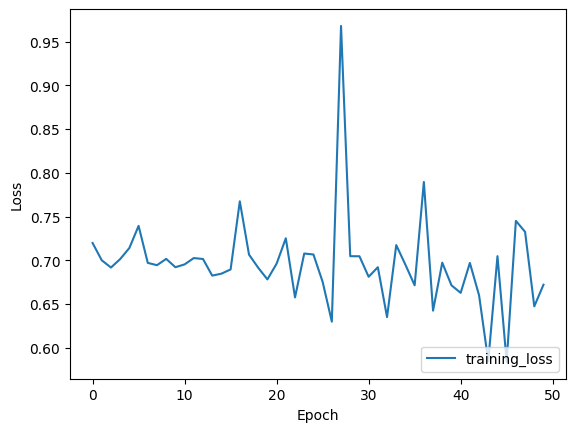

In [ ]:
plt.plot(range(50),history.history['loss'], label='training_loss')
#plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim()
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)